In [3]:
#https://analyticsindiamag.com/how-to-apply-smoothing-methods-in-time-series-analysis/
#!pip install statsmodels

     ---------------------------------------- 9.0/9.0 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 KB 3.5 MB/s eta 0:00:00


In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
url = 'https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/Time%20Series%20Analysis/FB.csv'
data = pd.read_csv(url) 

In [4]:
#data.to_csv('FB.csv') #Facebook Stock Price
data = pd.read_csv('FB.csv')

In [5]:
data.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [5]:
close = data['Close']
testclose = close.iloc[-30:]
trainclose = close.iloc[:-30] 

In [6]:
# Mean Absolute Percentage Error
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

# if y_true is .6 and y_pred=.95 then mape = 100 * .35/.60 = 58%


In [7]:
def timeseries_evaluation_metrics(y_true, y_pred):
    print('Evaluation metric results: ')
    print(f'MSE value : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'RMSE value : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAE value : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE value : {metrics.mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 score : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 

In [8]:
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    fit_v = SimpleExpSmoothing(np.asarray(trainclose)).fit(i)
    # Holt-Winters exponential smoothing method or SimpleExpSmoothing
    # Used when data has both linear trend and seasonal pattern
    fcst_pred_v= fit_v.forecast(len(testclose))   
    rmse = np.sqrt(metrics.mean_squared_error(testclose, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']) 

,smoothing parameter,RMSE
10,1.0,9.878157
9,0.9,9.926882
8,0.8,10.008074
4,0.4,10.087624
7,0.7,10.088978
3,0.3,10.090519
5,0.5,10.136144
6,0.6,10.139199
2,0.2,10.432890
1,0.1,11.410474


In [9]:
 SES = SimpleExpSmoothing(np.asarray(trainclose))
 fit_SES = SES.fit(smoothing_level = 1, optimized=False)
 fcst_gs_pred = fit_SES.forecast(len(testclose))
 timeseries_evaluation_metrics(testclose, fcst_gs_pred) 

Evaluation metric results: 
MSE value : 97.57797868071496
RMSE value : 9.878156643864024
MAE value : 8.90366143333332
MAPE value : 0.04513333762437967
R2 score : -4.331316662144517



In [10]:
 SES = SimpleExpSmoothing(np.asarray(trainclose))
 fit_SES_auto = SES.fit(optimized= True, use_brute = True)
 fcst_auto_pred = fit_SES_auto.forecast(len(testclose))
 timeseries_evaluation_metrics(testclose, fcst_auto_pred) 

Evaluation metric results: 
MSE value : 97.68044567880288
RMSE value : 9.88334182747935
MAE value : 8.909413780800344
MAPE value : 0.045162808193535735
R2 score : -4.3369150975867345



In [11]:
fit_SES.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8968.966
Optimized:,False,AIC,2446.723
Trend:,None,BIC,2456.951
Seasonal:,None,AICC,2446.756
Seasonal Periods:,None,Date:,"Sun, 07 Aug 2022"
Box-Cox:,False,Time:,09:23:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,76.519997,l.0,False


In [13]:
#For grid search model

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(len(trainclose), len(close))
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index") 

 # For automatic model
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(len(trainclose), len(close))
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

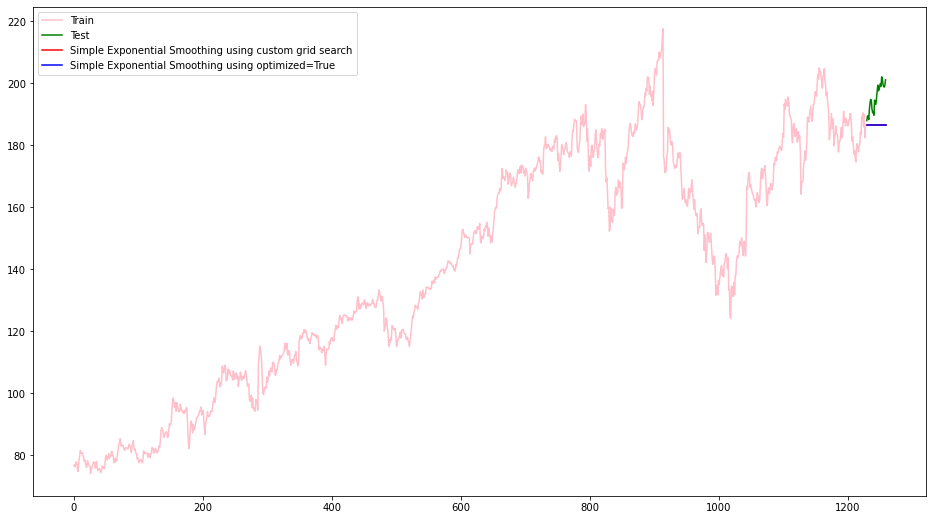

In [14]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainclose, label='Train', color="pink")
plt.plot(testclose, label='Test', color="g")
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search', color="r")
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True', color="b")
plt.legend(loc='best')
plt.show() 

